<div class="alert alert-block alert-info">

    
# Saas Fee Gravitational Wave School: Formation channels of Gravitational Waves (GWs)
    
In this jupyter notebook we will walk through and re-create some of the figures from https://arxiv.org/pdf/2010.00002.pdf on **Chemically Homogeneous Evolution** by Jeff Riley. <br>



Notebook by Floor Broekgaarden and Ilya Mandel <br>
<br>

The original data can be found on Zenodo https://zenodo.org/record/5595426 <br>

___




<div class="alert alert-block alert-warning">
    
### Definitions: 
    
    
 - CHE: Chemically Homogeneous Evolution, 
 - GW: Gravitational Waves 
 - DCO: Double Compact Object 
 - BH: Black Hole
 - NS: Neutron Star

In [1]:
# first we will import some of the packages that we will use 

import h5py as h5
import numpy as np
import os
import matplotlib.pyplot as plt


from astropy import units as u
from astropy import constants as const

In [2]:

# add path to where the COMPASOutput.h5 file is stored. 
# For you the part '/Volumes/Andromeda/DATA/AllDCO_bugfix/fiducial/' is probably different
path = '/Volumes/Andromeda/SAAS-FEE_CHE/COMPAS_Output.h5' # change this line! 


# the following line reads in the data 
fdata = h5.File(path)
print(fdata.keys())  # print the different files within the hdf5 folder: 

<KeysViewHDF5 ['CommonEnvelopes', 'DoubleCompactObjects', 'Supernovae', 'SystemParameters']>


<div class="alert alert-block alert-success"> 


the files above 'CommonEnvelopes', 'DoubleCompactObjects', 'Supernovae', 'SystemParameters' store the properties of the simulated binaries at the stages of the 'commen enevelope' (in case there is one), the moment of double object formation, the moment of the supernova, and the initial conditions (at the zero-age main sequence).

#### We can view what parameters are stored by again using the command .keys()
    
    
</div>

In [3]:
print(fdata['DoubleCompactObjects'].keys())

print()

print(fdata['SystemParameters'].keys())

<KeysViewHDF5 ['Coalescence_Time', 'Eccentricity@DCO', 'MT_Case_1', 'MT_Case_2', 'Mass_1', 'Mass_2', 'Merges_Hubble_Time', 'Recycled_NS_1', 'Recycled_NS_2', 'SEED', 'Separation@DCO', 'Stellar_Type_1', 'Stellar_Type_2', 'Time']>

<KeysViewHDF5 ['CE_Alpha', 'CH_on_MS_1', 'CH_on_MS_2', 'Eccentricity@ZAMS', 'Equilibrated', 'Equilibrated_At_Birth', 'Error', 'Experienced_RLOF_1', 'Experienced_RLOF_2', 'Experienced_SN_Type_1', 'Experienced_SN_Type_2', 'LBV_Multiplier', 'LBV_Phase_Flag_1', 'LBV_Phase_Flag_2', 'Mass@ZAMS_1', 'Mass@ZAMS_2', 'Merger', 'Merger_At_Birth', 'Metallicity@ZAMS_1', 'Metallicity@ZAMS_2', 'Omega@ZAMS_1', 'Omega@ZAMS_2', 'SEED', 'SN_Kick_Magnitude_Random_Number_1', 'SN_Kick_Magnitude_Random_Number_2', 'SN_Kick_Mean_Anomaly_1', 'SN_Kick_Mean_Anomaly_2', 'SN_Kick_Phi_1', 'SN_Kick_Phi_2', 'SN_Kick_Theta_1', 'SN_Kick_Theta_2', 'Separation@ZAMS', 'Sigma_Kick_CCSN_BH', 'Sigma_Kick_CCSN_NS', 'Sigma_Kick_ECSN', 'Sigma_Kick_USSN', 'Stellar_Type@ZAMS_1', 'Stellar_Type@ZAMS_2', 'Stel

<div class="alert alert-block alert-success"> 

#### The meaning of all parameters and files are described here https://compas.readthedocs.io/en/latest/pages/User%20guide/COMPAS%20output/standard-logfiles.html


Now that we have the data, we can do some data investigation. Here is an example: 
    
<div>

<div class="alert alert-block alert-warning">
    
#### Question 0: check and write down the length of each of the datasets 'CommonEnvelopes', 'DoubleCompactObjects', 'Supernovae', 'SystemParameters' (i.e. the number of rows). If they are different why is this so? And do you expect the order of the sizes? 

<div class="alert alert-block alert-warning">

    
## Example 1: plotting BH masses 
___
below we show an example of how to obtain and plot the BH masses in the dataset 



In [19]:
fDCO      = fdata['DoubleCompactObjects']


M1 =  fDCO['Mass_1'][...].squeeze()  # mass in Msun of the compact object resulting from the primary
M2 =  fDCO['Mass_2'][...].squeeze()  # mass in Msun of the compact object resulting from the secondary



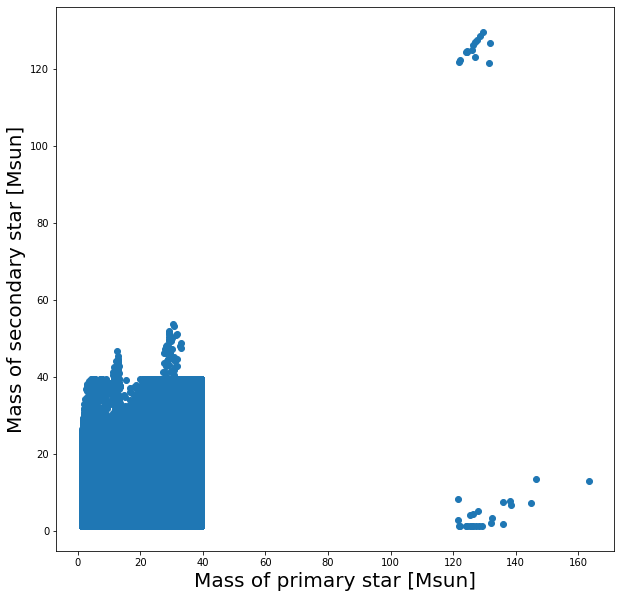

In [5]:
f, ax= plt.subplots(1, 1,  figsize=(10,10)) 

plt.scatter(M1, M2)
plt.xlabel('Mass of primary star [Msun]', fontsize=20)
plt.ylabel('Mass of secondary star [Msun]', fontsize=20)
plt.show()

<div class="alert alert-block alert-warning">

#### Question 1: can you explain the features in the plot above? E.g., where are the gaps, where are the most datapoints?


<div class="alert alert-block alert-warning">
    
#### Question 2: Using the parameters in the 'DoubleCompactObjects' dataset and the example above, try to make a scatter plot of Total Mass (M1+M2) versus orbital Period of the BBH systems that merge within a Hubble time (13.7 Gyr) 
    
You will have to use the function below

In [17]:

def convert_a_to_P_circular(separation, M1, M2):
    """calculate Period from separation
    separation is separation (needs to be given in astropy units)
    M1 and M2 are masses of the binary
    
    """
    G = const.G # [gr cm s^2]
    

    mu = G*(M1+M2)
    period = 2*np.pi * np.sqrt(separation**3/mu)
    
    
    
    return period     

<div class="alert alert-block alert-success">
    
### Answer: 

f, ax= plt.subplots(1, 1,  figsize=(10,10)) 


separation =  fDCO['Separation@DCO'][...].squeeze()
Period = convert_a_to_P_circular(separation, M1, M2)
coalescence_time =  fDCO['Coalescence_Time'][...].squeeze() * u.Myr # Myr 
print(coalescence_time)
t_Hubble = 13.7 *u.Gyr
mask_tHubble = (coalescence_time < t_Hubble)

plt.scatter((M1+M2)[mask_tHubble], Period[mask_tHubble])
plt.xlabel('Mass of primary star [Msun]', fontsize=20)
plt.ylabel('Period [day]', fontsize=20)
plt.show()

<div class="alert alert-block alert-warning">
    
#### Question 3: Why does the plot that you created look different compared to the figure 6 in https://arxiv.org/pdf/2010.00002.pdf? (you may ignore the metallicity axes) 

<div class="alert alert-block alert-success"> 
    
## Selecting CHE binaries: 
    
    
 For binaries, Stellar_Type@ZAMS(1) and Stellar_Type@ZAMS(2) will tell you the initial stellar type of each star - type 15 is CH.
CH_on_MS(1) and CH_on_MS(2) are each true if the star remained as CH for the entire MS - they will be false if the star spun down and stopped being CH on the MS.  So any star that was initially CH, and stayed CH on the entire MS is considered to be CHE. We can check which of our binary black holes is a "CHE" by using this information stored in the 'systemParameters' file, and matching it with the double compact object files using the randomSeed.
    

In [ ]:
fsys      = fdata['SystemParameters']

CH_on_MS_1 =  fsys['CH_on_MS_1'][...].squeeze()  # mass in Msun of the compact object resulting from the primary
CH_on_MS_2 =  fsys['CH_on_MS_2'][...].squeeze()  # mass in Msun of the compact object resulting from the secondary
Stellar_TypeZAMS_1  =  fsys['Stellar_Type@ZAMS_1'][...].squeeze()  # mass in Msun of the compact object resulting from the primary
Stellar_TypeZAMS_2  =  fsys['Stellar_Type@ZAMS_2'][...].squeeze()  # mass in Msun of the compact object resulting from the secondary




 # Extra material: